The dataset contains real estate sales records in NYC.
The following code performs an exploratory analysis on this dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import sklearn 
import matplotlib.pyplot as plt
from pathlib import Path
from cleaner import CleanDS

Obtain the data. An explanation for each data column can be found on the NYC website: https://www.nyc.gov/site/finance/taxes/

Put the data in the CleanDS class for data cleaning.

In [2]:

file_path = "Files\\"
dataset_name = "nyc-rolling-sales.csv"
path = file_path + dataset_name
df_housing = pd.read_csv(path, header=0)
clean = CleanDS(df_housing)
clean.df_housing.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


Clean and filter the dataset
The "SALE PRICE", "LAND SQUARE FEET" and "GROSS SQUARE FEET" columns contain entries with dashes. Replace with null values.

Remove unnecessary columns.

Remove duplicate rows.

In [3]:
clean.convert_objects_to_integers(["SALE PRICE", "LAND SQUARE FEET", "GROSS SQUARE FEET"])
clean.remove_unnecessary_columns(['Unnamed: 0', 'LOT', 'EASE-MENT','APARTMENT NUMBER', 'ADDRESS','ZIP CODE'])
clean.remove_duplicate_rows()


2751 rows were deleted as duplicates, a reduction of 3.25%


There are a small number of rows with null values 

In [4]:
clean.df_housing.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
BUILDING CLASS AT PRESENT             0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  24872
GROSS SQUARE FEET                 26098
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        12869
SALE DATE                             0
dtype: int64

Remove these rows with null values

In [5]:
clean.remove_null_rows()

34489 rows were deleted with null values, a reduction of 40.79%


From the NYC website;

 ```python
A $0 sale indicates that there was a transfer of ownership without a cash consideration. There can be a number of reasons for a $0 sale including transfers of ownership from parents to children.
```

We need to remove these sales entries as well as this is a special case that does not indicate the sales price of the property.

We also need to remove rows where the BUILD YEAR is zero, which does not make sense

In [6]:
clean.remove_rows_value_zero(['SALE PRICE', 'YEAR BUILT'])

9574 rows were deleted where SALE PRICE is zero, a reduction of 11.32%
1798 rows were deleted where YEAR BUILT is zero, a reduction of 2.13%


In fact for Sales Price there are many examples of the price being unusually low (less than $1000) or unusually large (greater than $0.5Billion)
So remove those as well.

In [7]:
clean.remove_outliers('SALE PRICE', 1000, 500000000)

873 rows were deleted for SALE PRICE that were outside the limits of 1000 to 500000000, a reduction of 1.03%


Remove impossible area values where Land Square Feet > Gross Square Feet

In [8]:
clean.remove_impossible_land_areas()

26581 rows were deleted where the Land Square Feet is greater than the Gross Square Feet, a reduction of 31.44%


Create a column to rescale the Sales Price to millions to improve the visual representation of Sales Price
Create a new Borough names column that maps onto the borough number.
Convert the Sales Date field into a date field and create a new Sale Month column

In [9]:
clean.make_sale_date_column_a_date()
clean.add_new_columns()
clean.df_housing.head()

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BOROUGH_NAME,SALE_MONTH,AGE
0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,C2,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19,Manhattan,7,122
3,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,C4,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23,Manhattan,9,109
4,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,C2,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17,Manhattan,11,122
6,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,C4,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23,Manhattan,9,102
9,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,D9,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07,Manhattan,11,102


In [10]:
col_names = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT',
       'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', "BOROUGH_NAME",
       'BLOCK', 'TAX CLASS AT TIME OF SALE']

clean.convert_data_type_to_categories(col_names)
clean.df_housing.info()    
clean.df_housing.describe().apply(lambda s: s.apply('{0:.5f}'.format)).transpose()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8482 entries, 0 to 84543
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   NEIGHBORHOOD                    8482 non-null   category      
 1   BUILDING CLASS CATEGORY         8482 non-null   category      
 2   TAX CLASS AT PRESENT            8482 non-null   category      
 3   BLOCK                           8482 non-null   category      
 4   BUILDING CLASS AT PRESENT       8482 non-null   category      
 5   RESIDENTIAL UNITS               8482 non-null   int64         
 6   COMMERCIAL UNITS                8482 non-null   int64         
 7   TOTAL UNITS                     8482 non-null   int64         
 8   LAND SQUARE FEET                8482 non-null   Int64         
 9   GROSS SQUARE FEET               8482 non-null   Int64         
 10  YEAR BUILT                      8482 non-null   int64         
 11  TAX

,count,mean,std,min,25%,50%,75%,max
RESIDENTIAL UNITS,8482.00000,6.25253,26.53003,0.00000,2.00000,2.00000,3.00000,948.00000
COMMERCIAL UNITS,8482.00000,0.84626,25.52568,0.00000,0.00000,0.00000,0.00000,2261.00000
TOTAL UNITS,8482.00000,7.09703,36.91645,0.00000,2.00000,3.00000,4.00000,2261.00000
LAND SQUARE FEET,8482.00000,3275.63535,10583.56031,200.00000,1742.00000,2000.00000,2500.00000,679000.00000
GROSS SQUARE FEET,8482.00000,8606.53914,31728.74181,700.00000,2295.00000,3007.50000,4180.00000,1021752.00000
YEAR BUILT,8482.00000,1935.27211,34.61093,1800.00000,1910.00000,1926.00000,1955.00000,2016.00000
SALE PRICE,8482.00000,3292418.86666,12299057.51319,2000.00000,560000.00000,975250.00000,1879752.50000,330000000.00000
SALE_MONTH,8482.00000,6.52051,3.48448,1.00000,3.00000,6.00000,9.00000,12.00000
AGE,8482.00000,86.72789,34.61093,6.00000,67.00000,96.00000,112.00000,222.00000


Save the dataframe with the cleaned data to a file

In [11]:
output_path = f'{file_path}/cleaned_nyc-rolling-sales.csv'
if os.path.exists(output_path):
    os.remove(output_path)
    
filepath = Path(output_path)
clean.df_housing.to_csv(filepath)

<AxesSubplot:xlabel='BOROUGH_NAME', ylabel='Count'>

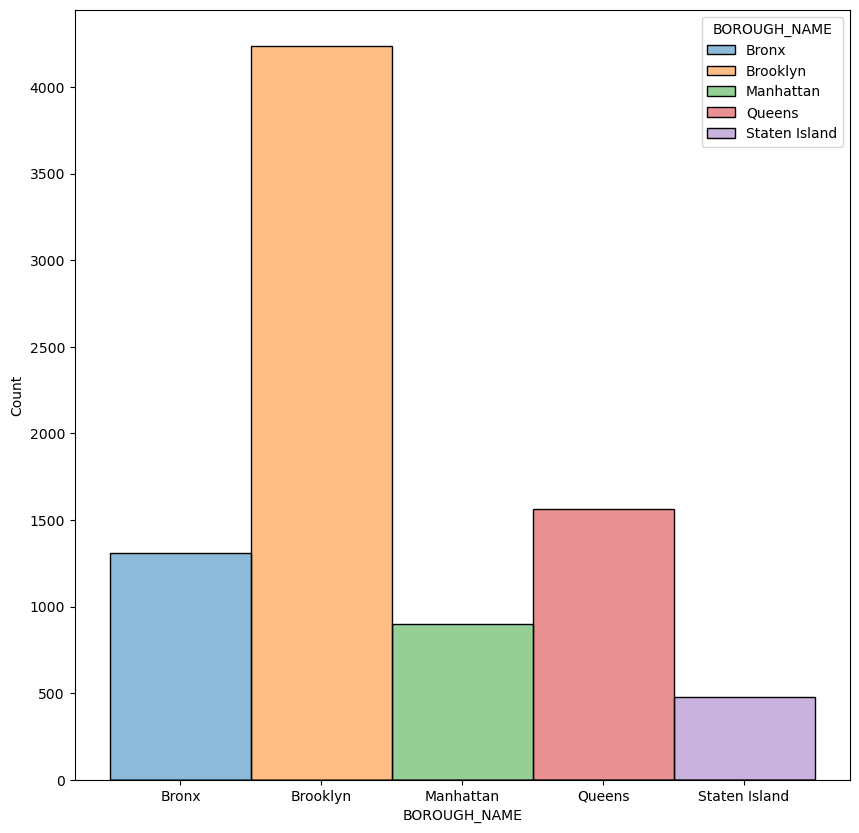

In [12]:
plt.figure(figsize = (10,10))
sns.histplot(data=clean.df_housing, x="BOROUGH_NAME", hue="BOROUGH_NAME")

Now the data is ready for EDA. Some of the data is categorical and some of data is continuous.

Lets look at the age of the property and the sales price

<AxesSubplot:xlabel='AGE', ylabel='SALE PRICE'>

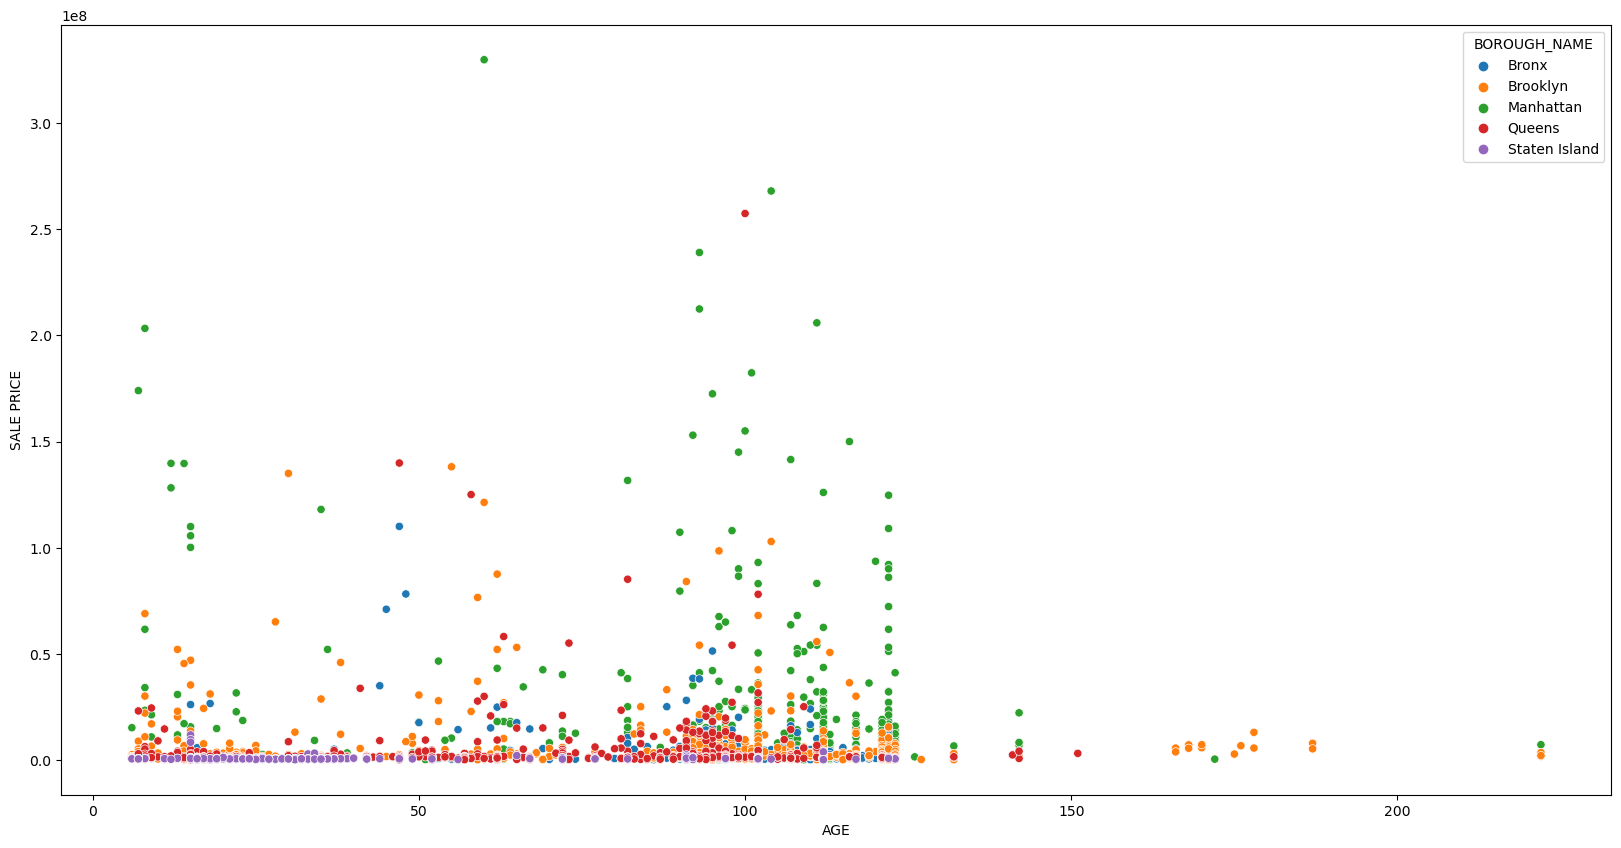

In [13]:
plt.figure(figsize = (20,10))
sns.scatterplot(data=clean.df_housing, x="AGE", y="SALE PRICE", hue="BOROUGH_NAME")


Lets see the distribution of sales prices

<AxesSubplot:xlabel='SALE DATE', ylabel='SALE PRICE'>

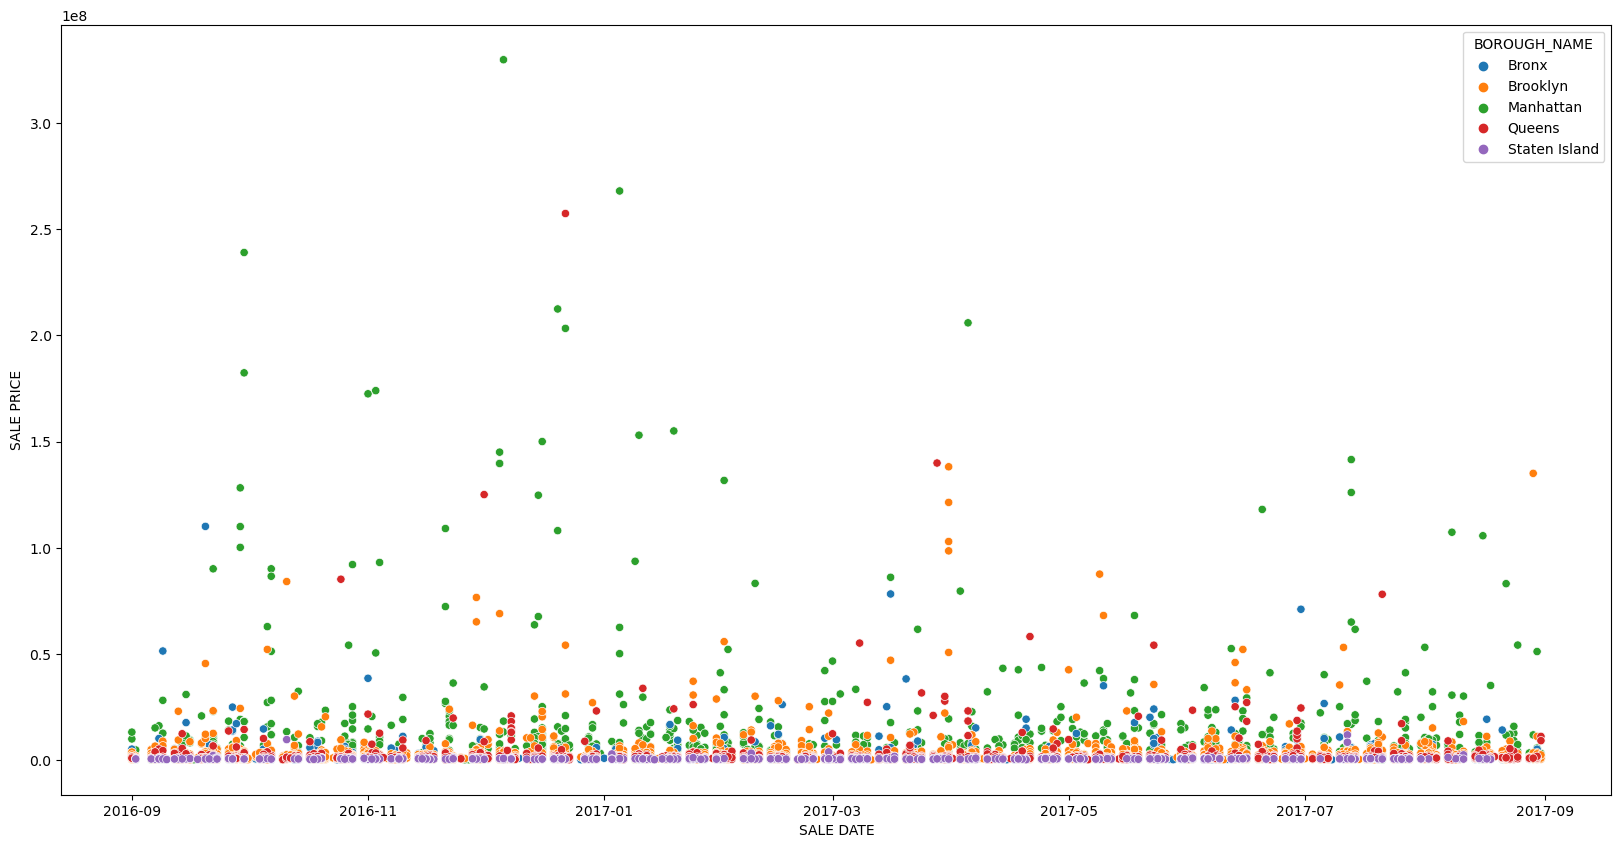

In [14]:
plt.figure(figsize = (20,10))
sns.scatterplot(data=clean.df_housing, x="SALE DATE", y="SALE PRICE", hue="BOROUGH_NAME")

<AxesSubplot:xlabel='SALE_MONTH', ylabel='SALE PRICE'>

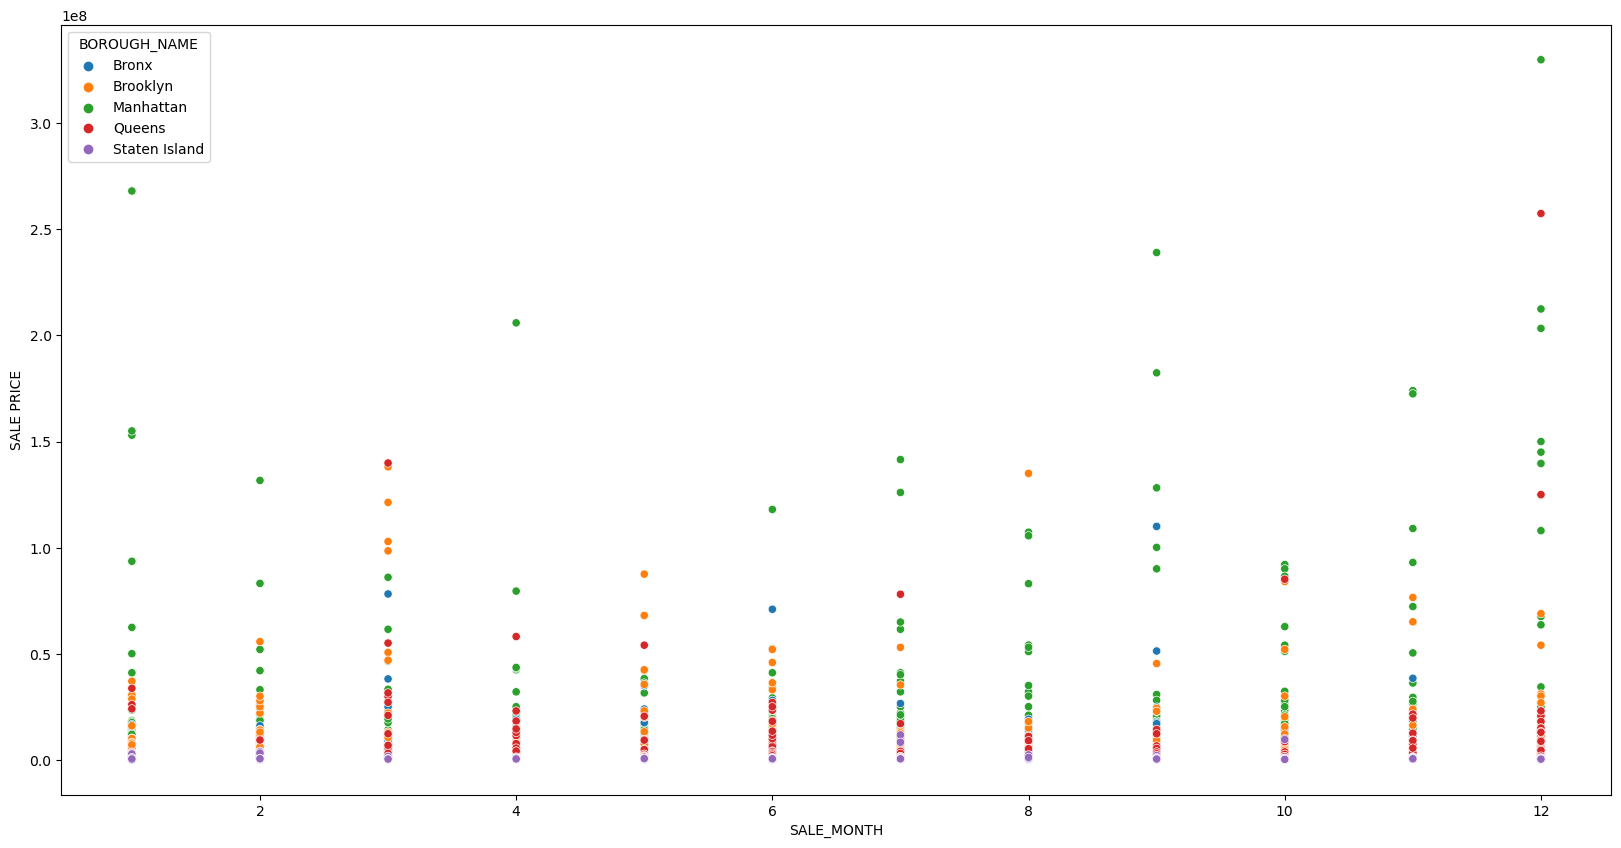

In [15]:
plt.figure(figsize = (20,10))
sns.scatterplot(data=clean.df_housing, x="SALE_MONTH", y="SALE PRICE", hue="BOROUGH_NAME")

<AxesSubplot:xlabel='SALE PRICE', ylabel='Count'>

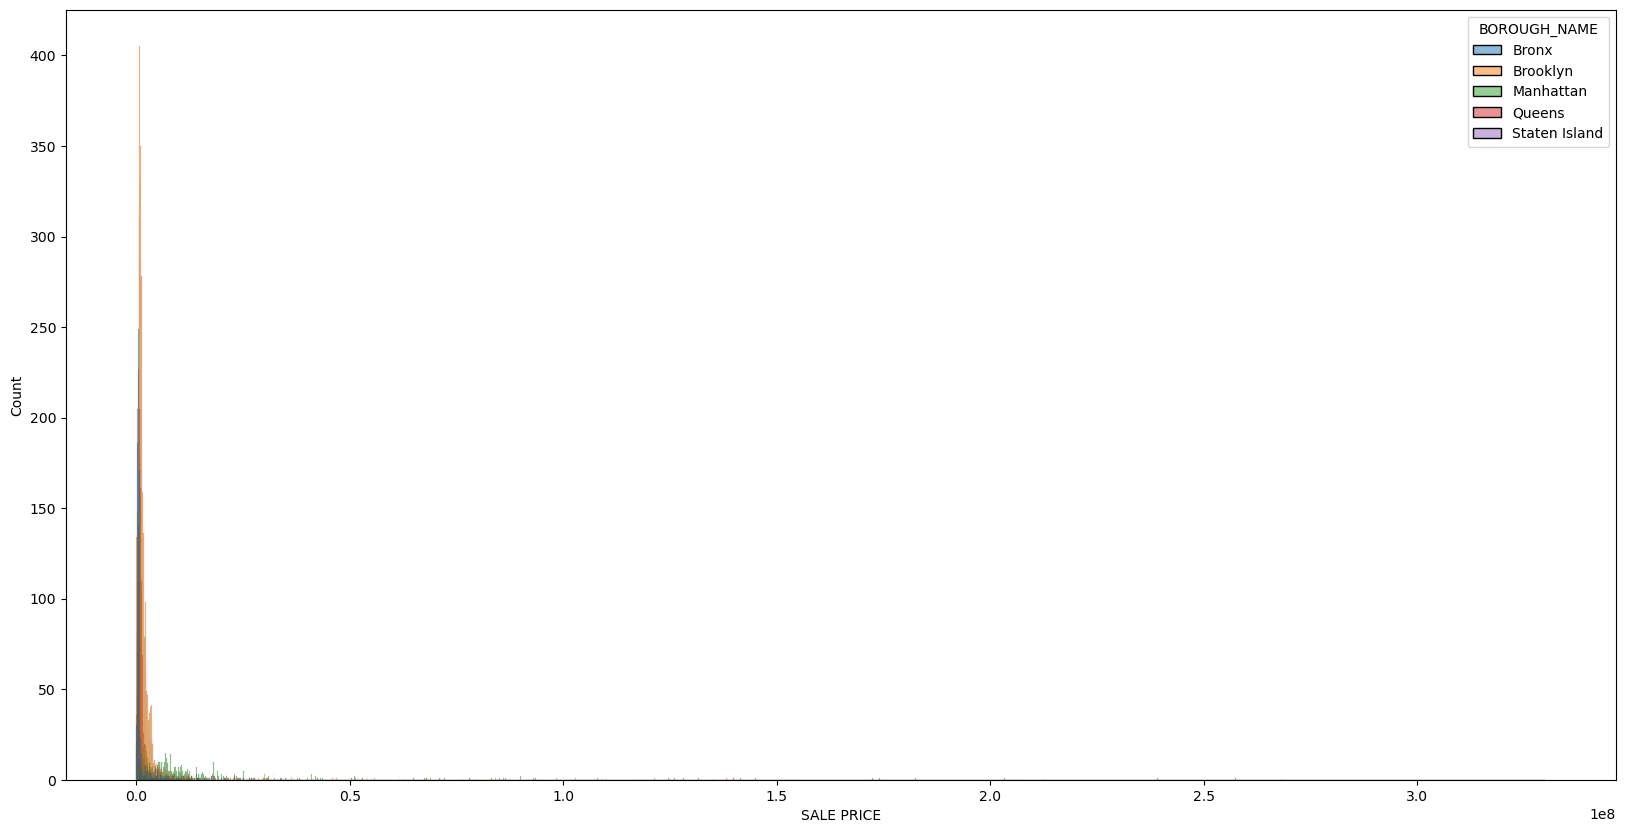

In [16]:
plt.figure(figsize = (20,10))
sns.histplot(data=clean.df_housing, x="SALE PRICE", hue="BOROUGH_NAME")

<AxesSubplot:xlabel='SALE PRICE', ylabel='Count'>

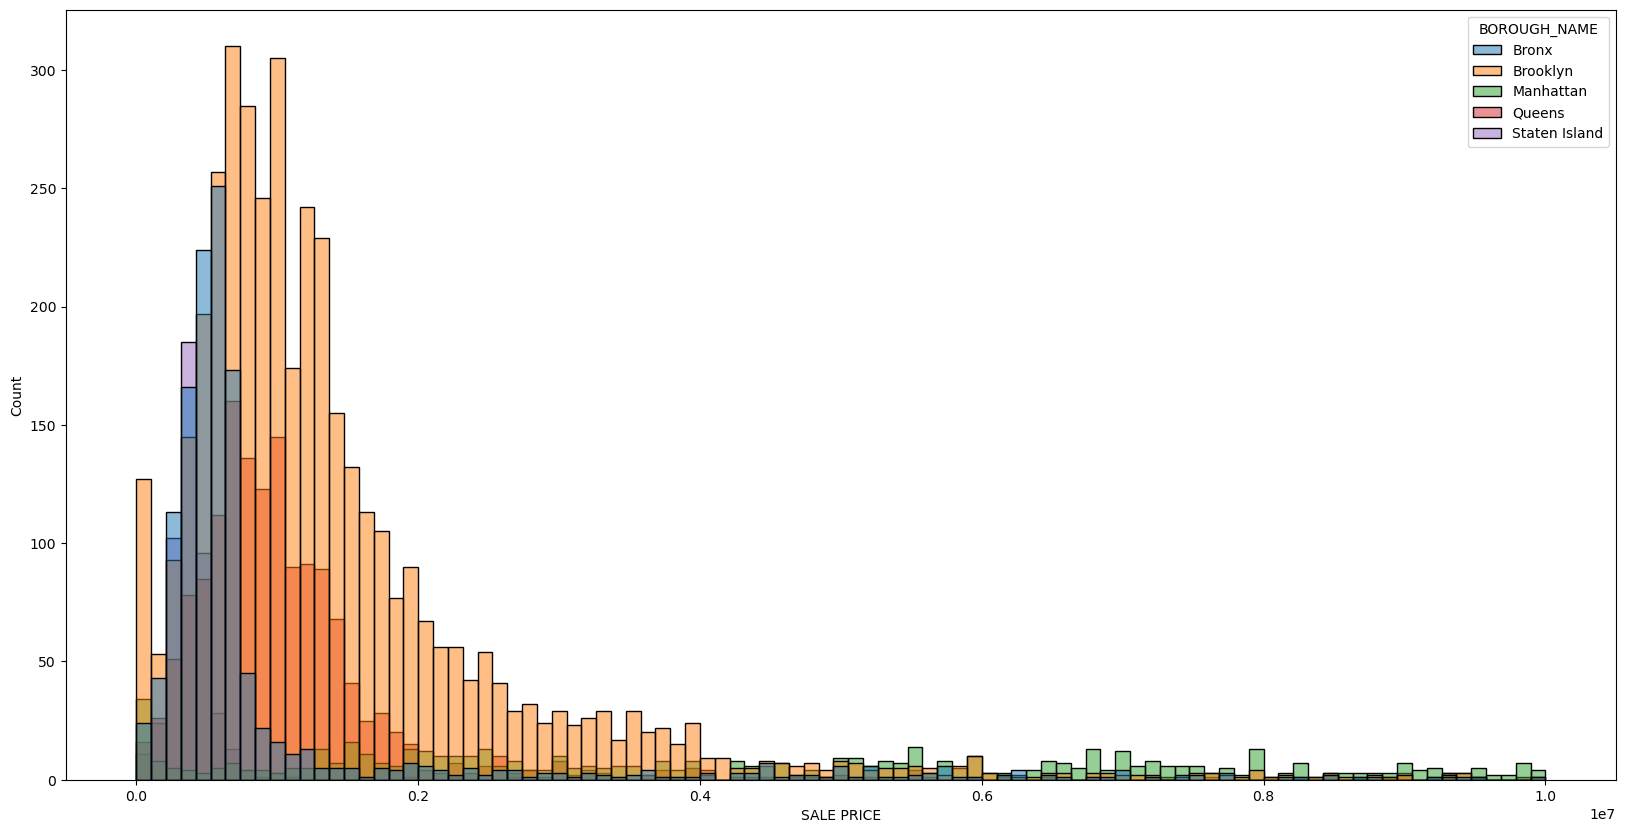

In [17]:
df_new_housing = clean.filter_less_than('SALE PRICE', 10000000)
plt.figure(figsize = (20,10))
sns.histplot(data=df_new_housing, x="SALE PRICE", hue="BOROUGH_NAME")

Check for correlation between area and SALE PRICE

<AxesSubplot:xlabel='TAX CLASS AT TIME OF SALE', ylabel='count'>

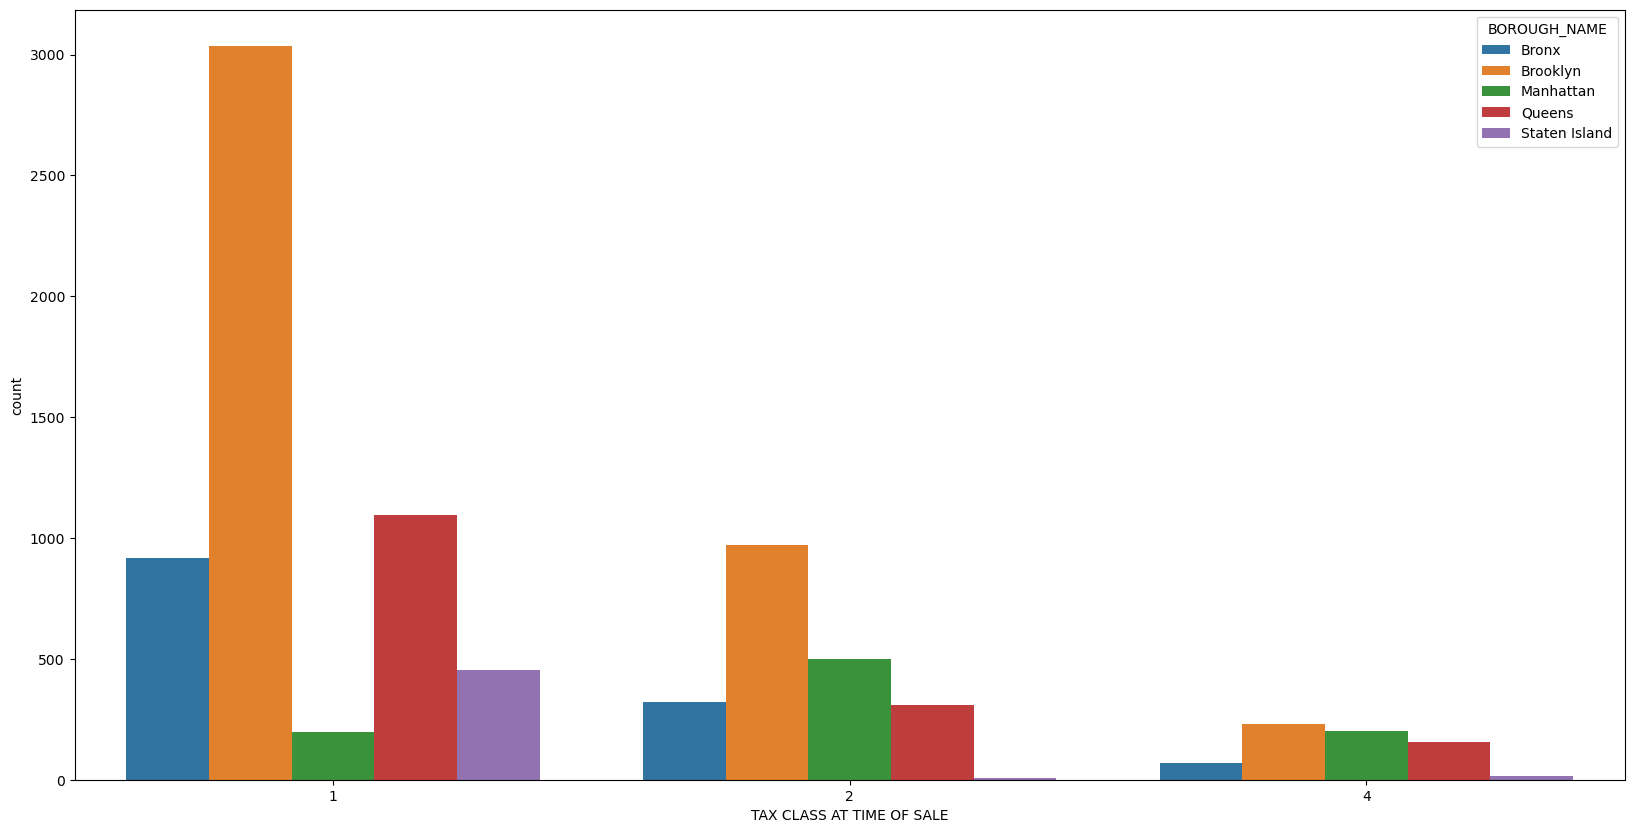

In [18]:
plt.figure(figsize = (20,10))
#sns.scatterplot(data=clean.df_housing, x="LAND SQUARE FEET")
sns.countplot(data=clean.df_housing, x="TAX CLASS AT TIME OF SALE", hue="BOROUGH_NAME")

<AxesSubplot:xlabel='BLOCK', ylabel='SALE PRICE'>

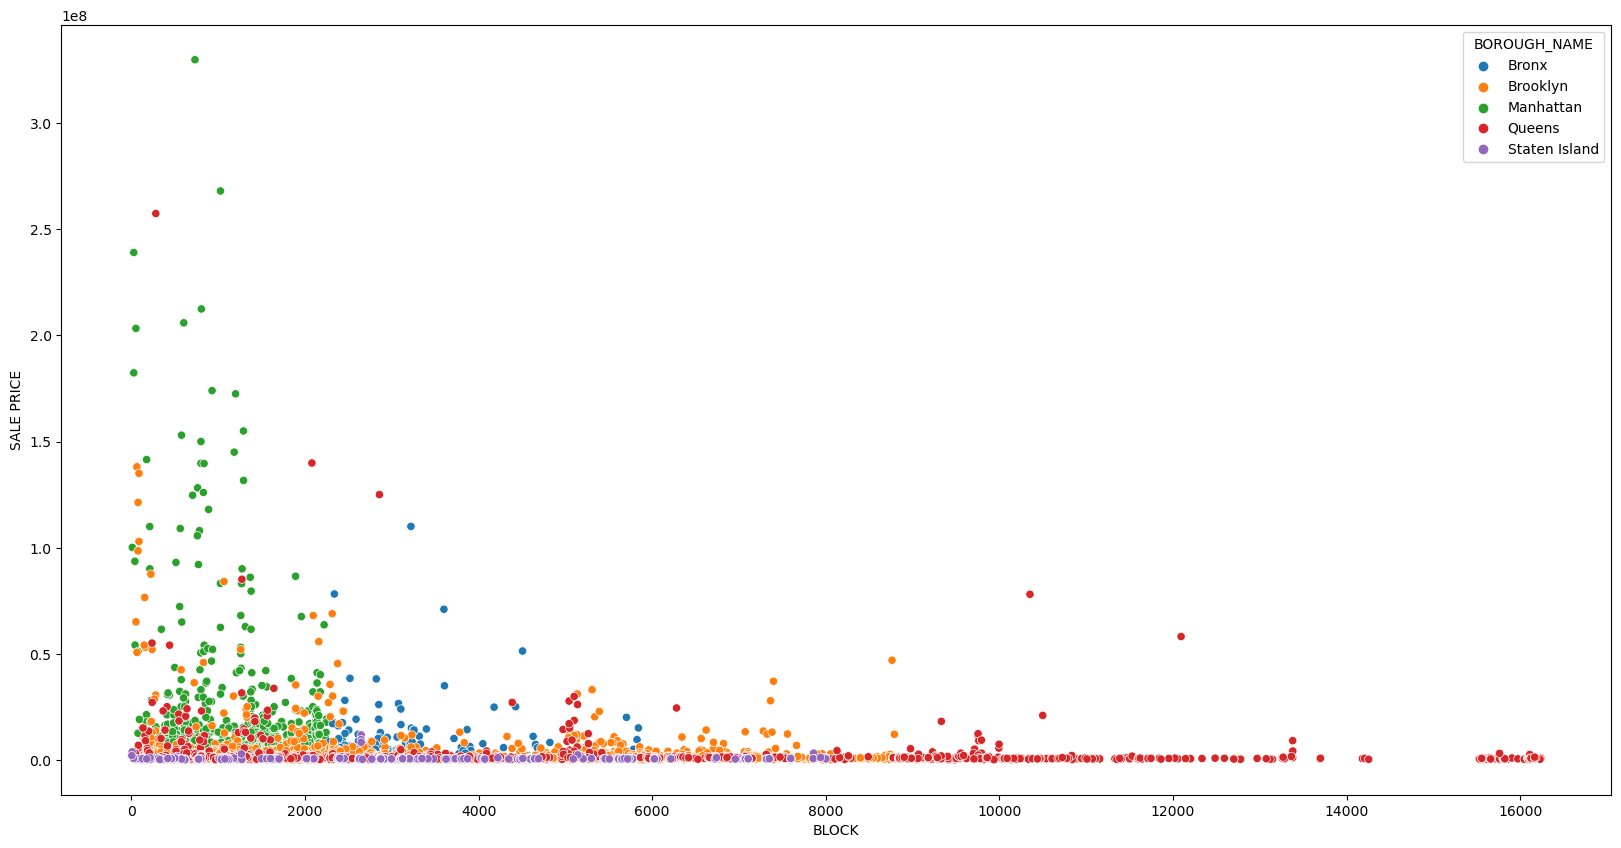

In [19]:
plt.figure(figsize = (20,10))
#sns.catplot(data=clean.df_housing, x="BLOCK", y="BOROUGH_NAME", hue="BOROUGH_NAME", orient="h")
sns.scatterplot(data=clean.df_housing, x="BLOCK", y="SALE PRICE", hue="BOROUGH_NAME")